In [1]:
from sklearn import datasets
import numpy as np
iris=datasets.load_iris()
cov_data=np.corrcoef(iris.data.T)

In [13]:
print(iris.feature_names)
print(cov_data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]


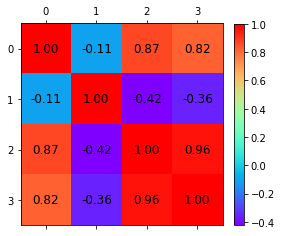

In [48]:
import matplotlib.pyplot as plt
img=plt.matshow(cov_data, cmap=plt.cm.rainbow)
plt.colorbar(img,fraction=0.045)
for x in range(cov_data.shape[0]):
    for y in range(cov_data.shape[1]):
        plt.text(x,y,"%0.2f" %cov_data[x,y],size=12,color='black',ha="center", va="center")
plt.show()

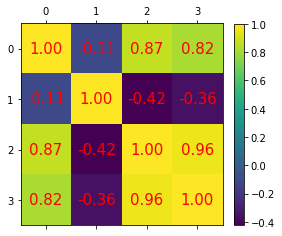

In [53]:
img=plt.matshow(cov_data)
plt.colorbar(img,fraction=0.045)
for x in range(cov_data.shape[0]):
    for y in range(cov_data.shape[1]):
        plt.text(x,y,"%0.2f" %cov_data[x,y],size=15,color='Red',ha="center", va="center")
plt.show()

In [73]:
from sklearn.decomposition import PCA
pca_2c = PCA(n_components=2)
X_pca_2c=pca_2c.fit_transform(iris.data)
X_pca_2c.shape

(150, 2)

In [87]:
X_pca_2c[:,0]

(150,)

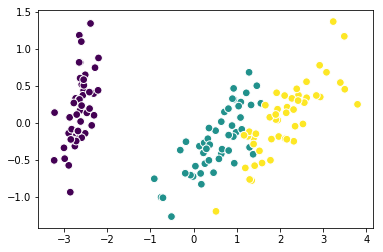

0.9776317750248034

In [91]:
plt.scatter(X_pca_2c[:,0],X_pca_2c[:,1],c=iris.target, s=60, marker='o', edgecolors='white')
plt.show()
pca_2c.explained_variance_ratio_.sum()

In [92]:
pca_2c.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

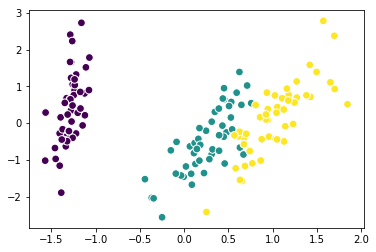

0.9776317750248034

In [93]:
pca_2cw = PCA(n_components=2, whiten=True)
X_pca_1cw=pca_2cw.fit_transform(iris.data)
plt.scatter(X_pca_1cw[:,0],X_pca_1cw[:,1],c=iris.target, s=60, marker='o', edgecolors='white')
plt.show()
pca_2cw.explained_variance_ratio_.sum()

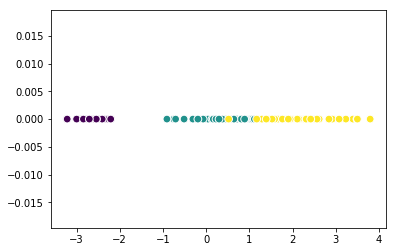

0.9246162071742684

In [95]:
pca_1c = PCA(n_components=1)
X_pca_1c=pca_1c.fit_transform(iris.data)
plt.scatter(X_pca_1c[:,0],np.zeros(X_pca_1c.shape),c=iris.target, s=60, marker='o', edgecolors='white')
plt.show()
pca_1c.explained_variance_ratio_.sum()

In [96]:
pca_95pc = PCA(n_components=0.95)
X_pca_95pc=pca_95pc.fit_transform(iris.data)
print(pca_95pc.explained_variance_ratio_.sum())
print(X_pca_95pc.shape)

0.9776317750248034
(150, 2)


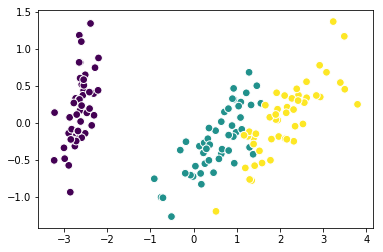

0.9776317750248033

In [101]:
from sklearn.decomposition import RandomizedPCA
rpca_2c = PCA(n_components=2, svd_solver='randomized')
X_rpca_2c=rpca_2c.fit_transform(iris.data)
plt.scatter(X_rpca_2c[:,0],X_rpca_2c[:,1],c=iris.target, s=60, marker='o', edgecolors='white')
plt.show()
rpca_2c.explained_variance_ratio_.sum()

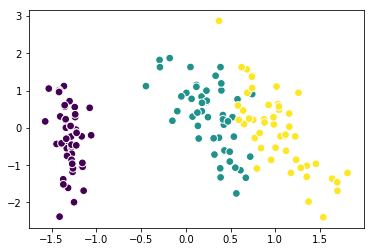

In [106]:
#LFA
from sklearn.decomposition import FactorAnalysis
fact_2c=FactorAnalysis(n_components=2)
X_factor=fact_2c.fit_transform(iris.data)
plt.scatter(X_factor[:,0],X_factor[:,1],c=iris.target, s=60, marker='o', edgecolors='white')
plt.show()

In [108]:
#LDA
from sklearn.lda import LDA
lda_2c=LDA(n_components=2)
X_lda_2c=lda_2c.fit_transform(iris.data,iris.target)
plt.scatter(X_lda_2c[:,0],X_lda_2c[:,1],c=iris.target, s=60, marker='o', edgecolors='white')
plt.show()

ModuleNotFoundError: No module named 'sklearn.lda'

In [112]:
#LSA
from sklearn.datasets import fetch_20newsgroups
categories=['sci.med','sci.space']
twenty_sci_news=fetch_20newsgroups(categories=categories)
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vect=TfidfVectorizer()
word_freq=tf_vect.fit_transform(twenty_sci_news.data)
from sklearn.decomposition import TruncatedSVD
tsvd_2c=TruncatedSVD(n_components=50)
tsvd_2c.fit(word_freq)
np.array(tf_vect.get_feature_names())[tsvd_2c.components_[20].argsort()[-10:][::-1]]

array(['jupiter', 'sq', 'comet', 'gehrels', 'of', 'gene', 'msb',
       'zisfein', 'omen', 'are'], dtype='<U79')

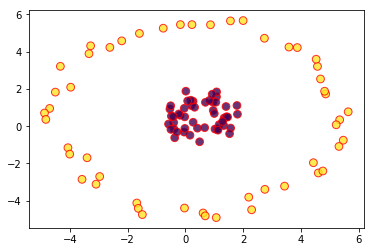

In [192]:
#ICA, kernel PCA
import pandas as pd
def circular_points(radius,N):
    return np.array([[np.cos(2*np.pi*t/N)*radius, np.sin(2*np.pi*t/N)*radius] for t in range(N)])
N_points=50
fake_circular_data=np.vstack([circular_points(1.0,N_points), circular_points(5.0,N_points)])
fake_circular_data+=np.random.rand(*fake_circular_data.shape)
fake_circular_target=np.array([0]*N_points + [1]*N_points)
plt.scatter(fake_circular_data[:,0], fake_circular_data[:,1], c=fake_circular_target, alpha=0.8, s=60, marker='o', edgecolors='red')
plt.show()

In [158]:
fake_circular_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

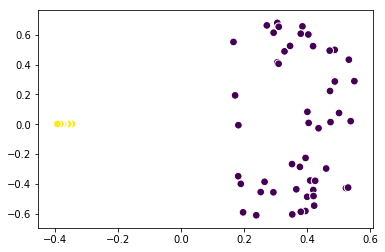

In [196]:
from sklearn.decomposition import KernelPCA
kpca_2c = KernelPCA(n_components=2, kernel='rbf')
X_kpca_2c = kpca_2c.fit_transform(fake_circular_data)
plt.scatter(X_kpca_2c[:,0],X_kpca_2c[:,1],c=fake_circular_target, s=60, marker='o', edgecolors='white')
plt.show()